<a href="https://www.kaggle.com/code/katherill/cow-faces?scriptVersionId=232517622" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 24.2 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image, ExifTags
import random
import cv2  
import torch  
from ultralytics import YOLO 
import wandb  
import os  
import numpy as np  
from collections import defaultdict  

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
def correct_rotation(image):
    try:
        for orientation in ExifTags.TAGS.keys():
            if ExifTags.TAGS[orientation]=='Orientation':
                break
        exif=dict(image._getexif().items())

        if   exif[orientation] == 3 :
            image=image.rotate(180, expand=True)
        elif exif[orientation] == 6 :
            image=image.rotate(-90, expand=True)
        elif exif[orientation] == 8 :
            image=image.rotate(90, expand=True)

    except (AttributeError, KeyError, IndexError):
        # No EXIF data or orientation tag
        pass
    return image  


In [4]:
def display_kaggle_images(directory, num_images=10, random_seed=42):
    try:
        image_files = [f for f in os.listdir(directory) if f.lower().endswith(".jpg")]
    except FileNotFoundError:
        print(f"Ошибка: Директория '{directory}' не найдена.")
        return

    if not image_files:
        print(f"В директории '{directory}' не найдено JPG-изображений.")
        return

    import random
    random.seed(random_seed)
    selected_images = random.sample(image_files, min(num_images, len(image_files)))

    num_cols = min(5, len(selected_images))
    num_rows = (len(selected_images) + num_cols - 1) // num_cols

    plt.figure(figsize=(12, 6 * num_rows))

    for i, image_file in enumerate(selected_images):
        try:
            image_path = os.path.join(directory, image_file)
            img = Image.open(image_path)
            img = correct_rotation(img)
            img_np = np.array(img)

            plt.subplot(num_rows, num_cols, i + 1)
            plt.imshow(img_np)
            plt.title(image_file, fontsize=8)
            plt.axis('off')

        except FileNotFoundError:
            print(f"Ошибка: Файл '{image_file}' не найден.")
        except IOError:
            print(f"Ошибка: Невозможно открыть или прочитать файл '{image_file}'.")
        except Exception as e:
            print(f"Произошла неожиданная ошибка при обработке файла '{image_file}': {e}")

    plt.tight_layout()
    plt.show()

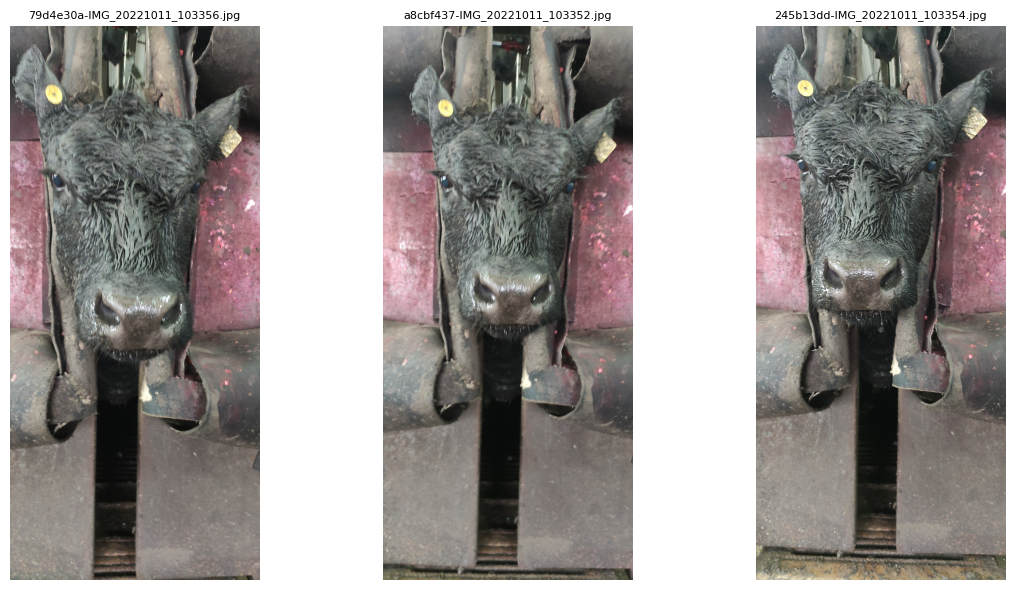

In [5]:
directory_path = "/kaggle/input/cow-face/train/images/1"
display_kaggle_images(directory_path, num_images=10)

In [6]:
model = YOLO('/kaggle/input/yolos/other/default/1/yolo11s.pt')

In [7]:
pip install Pillow

Note: you may need to restart the kernel to use updated packages.


In [8]:
from PIL import Image

def get_image_size(image_path):
   """
   Возвращает ширину и высоту изображения в пикселях.

   Args:
       image_path: Путь к файлу изображения.

   Returns:
       Кортеж (ширина, высота).  Возвращает None, если файл не найден или не является изображением.
   """

   img = Image.open(image_path)
   img = correct_rotation(img)
   img_np = np.array(img)
   width, height = img.size
   return width, height

# Пример использования
image_path = "/kaggle/input/cow-face/train/images/11/05528672-IMG_20221011_105916.jpg"  # Замените на путь к вашему изображению
size = get_image_size(image_path)

if size:
   width, height = size
   print(f"Ширина: {width} пикселей")
   print(f"Высота: {height} пикселей")


Ширина: 2080 пикселей
Высота: 4624 пикселей


In [9]:
torch.cuda.is_available()
torch.cuda.device_count()

2

In [10]:
torch.cuda.get_device_name(1)

'Tesla T4'

In [11]:
results = model.train(
    data="/kaggle/input/cow-face/data.yaml",  # Путь к файлу с конфигурацией данных в формате YAML
    epochs=20,  # Количество эпох обучения
    imgsz=(2080, 4624),  # Размер входных изображений (640x640 пикселей)
    batch=16,  # Размер пакета (batch size) для обучения
    augment=True,  # Включение аугментации данных для увеличения разнообразия обучающего набора
    fliplr=0.5,  # Вертикальное (горизонтальное) отражение изображений с вероятностью 50%
    scale=0.5,  # Применение случайного масштабирования изображений до 50%
    translate=0.2,  # Случайный сдвиг изображений до 10% от их размера
    hsv_h=0.1,  # Случайное изменение оттенка (hue) в пределах 10%
    hsv_s=0.1,  # Случайное изменение насыщенности (saturation) в пределах 70%
    hsv_v=0.1,  # Случайное изменение яркости (value) в пределах 40%
    dropout=True,  # Вероятность отключения (dropout) нейронов в 5% случаев во время обучения
    plots=True,  # Включение отображения графиков обучения и валидации
    device=0,  # Использование GPU 0 и 1 для ускорения обучения
    optimizer='AdamW'  # Использование оптимизатора AdamW для обновления весов модели
)

Ultralytics 8.3.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=/kaggle/input/yolos/other/default/1/yolo11s.pt, data=/kaggle/input/cow-face/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=(2080, 4624), save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=True, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=F

100%|██████████| 755k/755k [00:00<00:00, 22.7MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  3                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  4                  -1  1    103360  ultralytics.nn.modules.block.C3k2            [128, 256, 1, False, 0.25]    
  5                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  6                  -1  1    346112  ultralytics.nn.modules.block.C3k2            [256, 256, 1, True]           
  7                  -1  1   1180672  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 99.8MB/s]


AMP: checks passed ✅
WARNING ⚠️ updating to 'imgsz=4624'. 'train' and 'val' imgsz must be an integer, while 'predict' and 'export' imgsz may be a [h, w] list or an integer, i.e. 'yolo export imgsz=640,480' or 'yolo export imgsz=640'
WARNING ⚠️ imgsz=[4624] must be multiple of max stride 32, updating to [4640]


train: Scanning /kaggle/input/cow-face/train/labels/1... 252 images, 0 backgrounds, 1 corrupt: 100%|██████████| 252/252 [00:01<00:00, 128.97it/s]

train: WARNING ⚠️ /kaggle/input/cow-face/train/images/2/c4c6fb7a-IMG_20221011_103836.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.1143]
train: WARNING ⚠️ Cache directory /kaggle/input/cow-face/train/labels is not writeable, cache not saved.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.5 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /kaggle/input/cow-face/test/labels/76... 63 images, 0 backgrounds, 0 corrupt: 100%|██████████| 63/63 [00:00<00:00, 121.69it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/cow-face/test/labels is not writeable, cache not saved.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: AdamW(lr=0.01, momentum=0.937) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: WARNING ⚠️ TensorBoard graph visualization failure CUDA out of memory. Tried to allocate 330.00 MiB. GPU 0 has a total capacity of 14.74 GiB of which 264.12 MiB is free. Process 5814 has 14.48 GiB memory in use. Of the allocated memory 14.21 GiB is allocated by PyTorch, and 119.89 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)
Image sizes 4640 train, 4640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/16 [00:21<?, ?it/s]


OutOfMemoryError: CUDA out of memory. Tried to allocate 5.13 GiB. GPU 0 has a total capacity of 14.74 GiB of which 982.12 MiB is free. Process 5814 has 13.77 GiB memory in use. Of the allocated memory 11.11 GiB is allocated by PyTorch, and 2.50 GiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)